# Planar data classification with one hidden layer

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

2 - Dataset

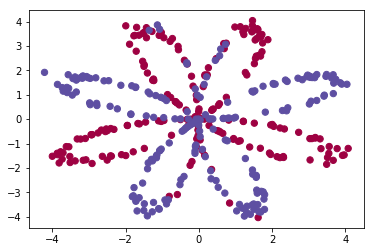

In [279]:
X, Y = load_planar_dataset() # X = (x-coordinate, y-coordinate)  Y - color map
plt.scatter(X[0,:], X[1,:], c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

In [266]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1] # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


----------------------------------------------
4 - Neural Network Model

Reminder: The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once you've built nn_model() and learnt the right parameters, you can make predictions on new data.

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$$$y^{(i)}_{prediction} = \begin{cases} 1 &amp; \mbox{if } a^{[2](i)} &gt; 0.5 \\ 0 &amp; \mbox{otherwise } \end{cases}\tag{5}$$

4.1) Defining the neural network structure

In [267]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    print('n_x, n_y %i, %i' %(n_x, n_y))
    return (n_x, n_y)

X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_y) = layer_sizes(X_assess, Y_assess)
#print("The size of the input layer is: n_x = " + str(n_x))
#print("The size of the output layer is: n_y = " + str(n_y))

n_x, n_y 5, 2


4.2) Initialize the model's parameter

In [268]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00530355 -0.00691661 -0.00396754 -0.00687173]]
b2 = [[0.]]


4.3) The Loop

In [269]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cache

X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431


$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{6}$$

In [270]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(A2) + (1 - Y)* np.log(1 - A2))
    cost = np.squeeze(cost)
    
    assert(isinstance(cost, float))
    return cost


A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


In [271]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return grads

parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [272]:
def update_parameters(parameters, grads, learning_rate = 0.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 -= dW1 * learning_rate
    b1 -= db1 * learning_rate
    W2 -= dW2 * learning_rate
    b2 -= db2 * learning_rate
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00619703  0.01731295]
 [-0.02328236  0.03277276]
 [-0.01685804 -0.01809817]
 [ 0.00954007 -0.05180208]]
b1 = [[-9.18637472e-07]
 [ 8.91924989e-06]
 [ 6.42841662e-07]
 [-2.65490056e-06]]
W2 = [[-0.01042839 -0.04093053  0.01632348  0.04491398]]
b2 = [[9.36739006e-05]]


4.4) Integrate parts 4.1, 4.2 and 4.3 together

In [273]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        if print_cost and i%1000 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
        
    return parameters

X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

n_x, n_y 2, 1


C:\nbmetools\anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\achen\planar_utils.py:32: RuntimeWarning: overflow encountered in exp
  return s


W1 = [[ 7.52967743 -1.24311138]
 [ 4.19446683 -5.32542016]
 [-7.52968614  1.2431309 ]
 [ 4.02936019 -5.48900933]]
b1 = [[-3.79473784]
 [-2.32994941]
 [ 3.79479657]
 [-2.27016982]]
W2 = [[ 6007.19761951  6033.57548633 -6007.41880563  6031.85805428]]
b2 = [[-52.74316002]]


$$y^{(i)}_{prediction} = \begin{cases} 1 &amp; \mbox{if } a^{[2](i)} &gt; 0.5 \\ 0 &amp; \mbox{otherwise } \end{cases}\tag{5}$$

In [274]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.zeros([1, A2.shape[1]])
    for i in range(A2.shape[1]):
        if A2[0, i] > 0.5:
            predictions[0, i] = 1
        else:
            predictions[0, i] = 0
    return predictions

parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions:", predictions)
print("predictions mean = " + str(np.mean(predictions)))

predictions: [[1. 0. 1.]]
predictions mean = 0.6666666666666666


n_x, n_y 2, 1
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220622
Cost after iteration 8000: 0.219398
Cost after iteration 9000: 0.218482


Text(0.5,1,'Decision Boundary for hidden layer size 4')

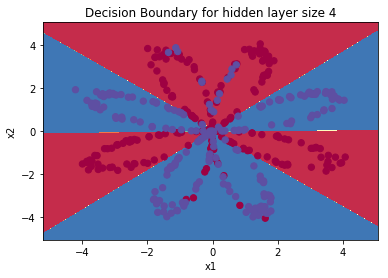

In [275]:
def c_plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, cmap=plt.cm.Spectral)
    
    
    
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
c_plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

4.6) Adjusting the size of hidden layer

n_x, n_y 2, 1
Accuracy for 1 hidden units: 67.5 %
n_x, n_y 2, 1
Accuracy for 2 hidden units: 67.25 %
n_x, n_y 2, 1
Accuracy for 3 hidden units: 90.75 %
n_x, n_y 2, 1
Accuracy for 4 hidden units: 90.5 %
n_x, n_y 2, 1
Accuracy for 5 hidden units: 91.25 %
n_x, n_y 2, 1
Accuracy for 10 hidden units: 91.0 %
n_x, n_y 2, 1
Accuracy for 20 hidden units: 91.0 %


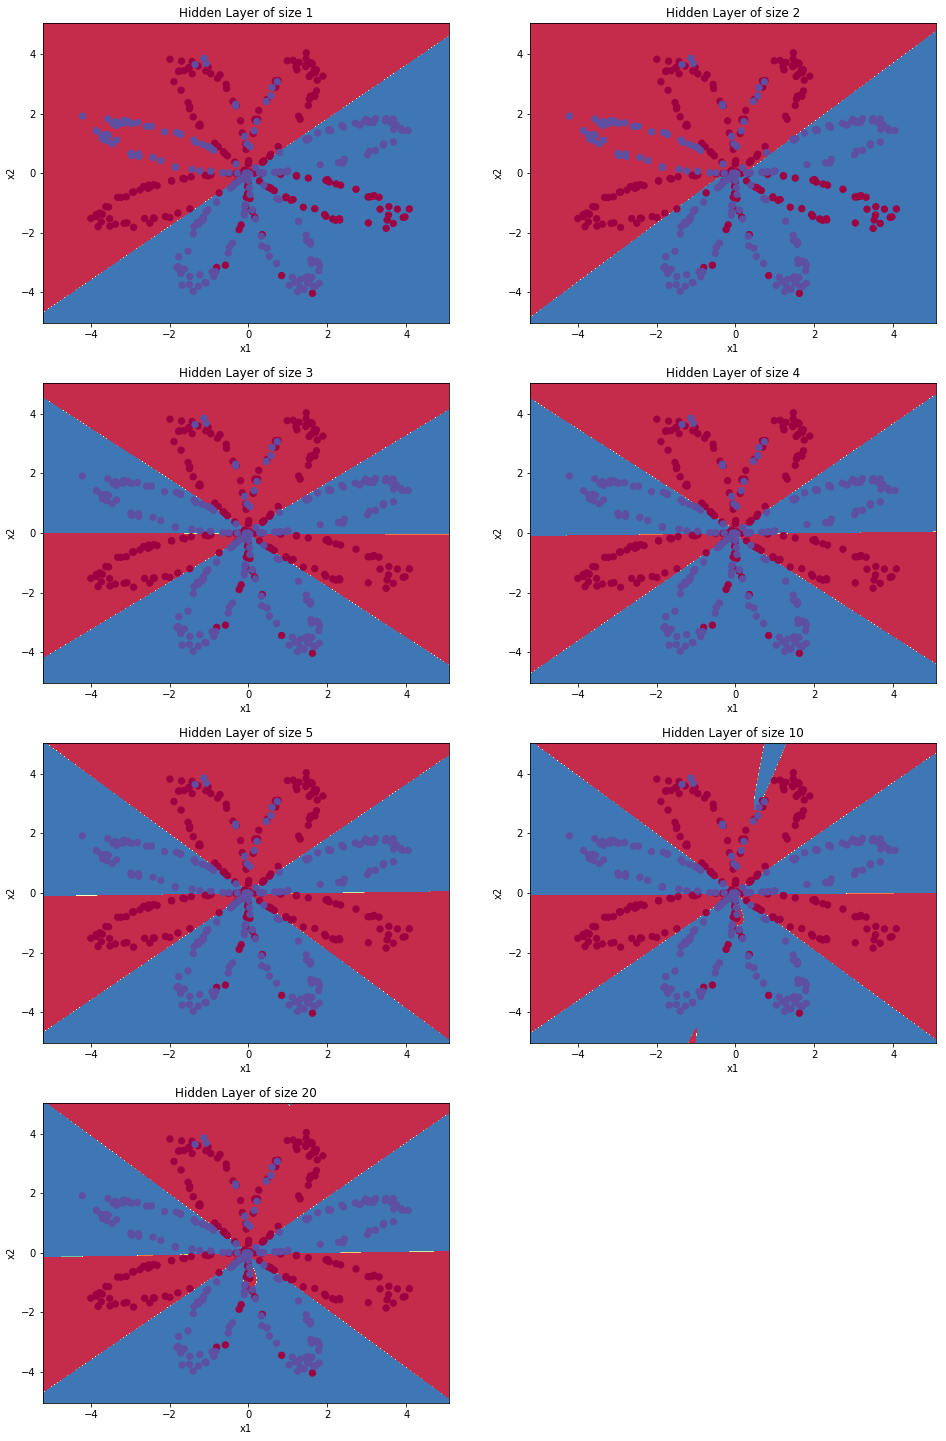

In [276]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,10,20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    c_plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

n_x, n_y 2, 1
n_x, n_y 2, 1
n_x, n_y 2, 1


C:\nbmetools\anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\nbmetools\anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
C:\nbmetools\anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\achen\planar_utils.py:32: RuntimeWarning: overflow encountered in exp
  return s


n_x, n_y 2, 1


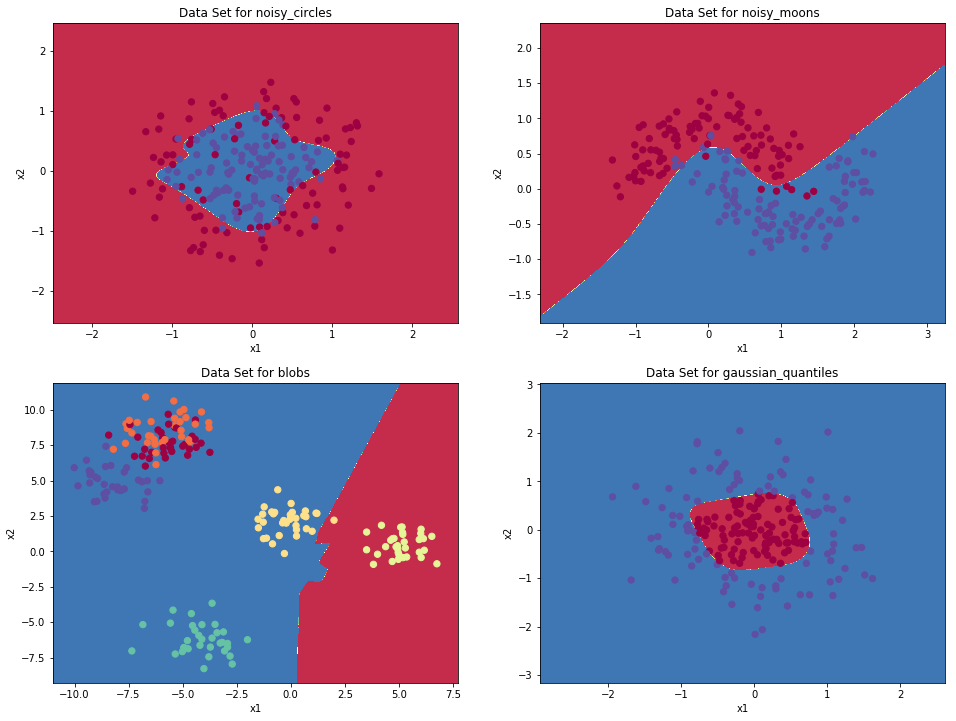

In [281]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

plt.figure(figsize=(16,32))
for i, ds in enumerate(datasets):
    plt.subplot(5, 2, i+1)
    plt.title('Data Set for %s' %(ds))
    X, Y = datasets[ds]
    X, Y = X.T, Y.reshape(1, Y.shape[0]) 
    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
    
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, cmap=plt.cm.Spectral)
    c_plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    